# Loading Data

In [3]:
data <- read.csv("D:/Research 2014-2015/Data Quality/keyword/Keyword/data.csv")

## The database is attached to the R search path. so objects in the database can be accessed by simply giving their names.
## attach(data,warn.conflicts = FALSE)

# Data Cleaning

In [4]:
## subsetting papers with document.type=="article"
data <- data[document.type=="article",]




dim(data)

[1] 346  59

In [5]:
## random sampling
set.seed(1)
random_index <- sample(1:nrow(data), size = 50, replace = FALSE, prob = NULL)
print(random_index)
data <- data[random_index,]
#unique(data$review)
#names(data)

 [1]  92 129 198 312  69 307 322 225 213  21  70  60 230 128 256 165 237 327 125
[20] 255 305 342 212  41  87 124   5 122 277 108 153 189 155  59 259 208 247  34
[39] 223 127 252 344 239 168 160 238   7 143 219 206


In [34]:
data <- data[which (!(row.names(data) %in% c(249,170))),]
data <- data[which (!(row.names(data) %in% c(258))),]
data <- data[which (!(row.names(data) %in% c(254))),]
data <- data[which (!(row.names(data) %in% c(315))),]

# Creating Predictors and Target

In [6]:
## "abstract_sum","title_sum",
##  "article_squaredage" 
## "review"

predictors <- c("abstract_title_sum","no_authors",                   
"article_age", "title_length","page.count","no_references","abstract_length")

target <- c("cited.by")

data <- data[,c(predictors,target)]
data <- na.omit(data)

str(data)


'data.frame':	50 obs. of  8 variables:
 $ abstract_title_sum: int  0 14 2 6 4 4 14 11 4 0 ...
 $ no_authors        : int  1 3 1 1 4 8 3 3 3 1 ...
 $ article_age       : int  1 1 1 2 1 2 2 1 1 1 ...
 $ title_length      : int  18 11 11 25 14 15 7 23 7 22 ...
 $ page.count        : int  10 10 12 10 17 15 12 9 11 16 ...
 $ no_references     : int  68 46 63 44 30 66 83 58 81 26 ...
 $ abstract_length   : int  178 157 154 164 171 223 173 118 212 203 ...
 $ cited.by          : int  1 1 2 9 4 7 2 1 1 0 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.585   3.000   6.000 

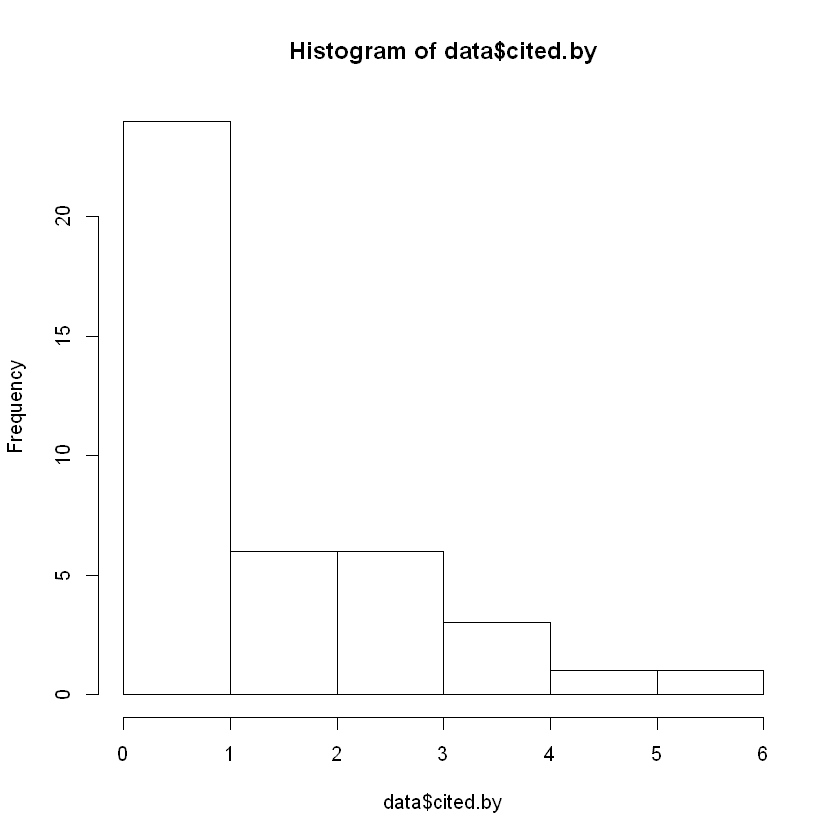

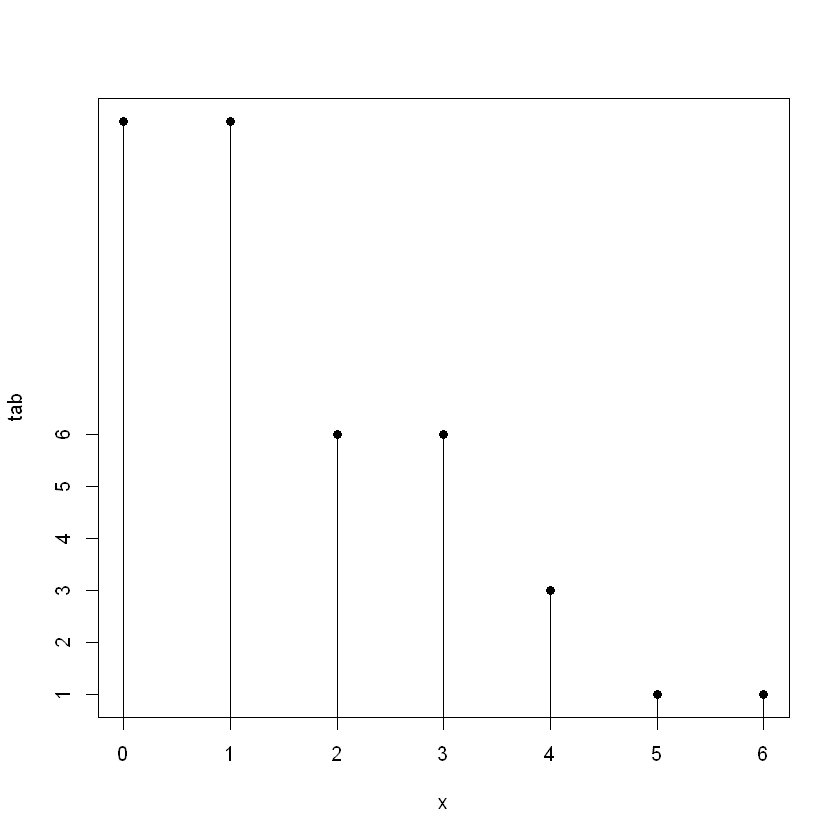

In [35]:
summary(data$cited.by)

hist(data$cited.by)

x<- sort(unique(data$cited.by))
tab <- table(data$cited.by)
plot(x,tab,type="h")
points(x,tab,pch=16)


# Poisson Regression


Call:
glm(formula = cited.by ~ abstract_title_sum, family = poisson(link = log), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8518  -1.6447  -0.4675   0.8865   2.5417  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.53916    0.14905   3.617 0.000298 ***
abstract_title_sum -0.02635    0.03018  -0.873 0.382526    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 67.146  on 40  degrees of freedom
Residual deviance: 66.343  on 39  degrees of freedom
AIC: 144.91

Number of Fisher Scoring iterations: 5


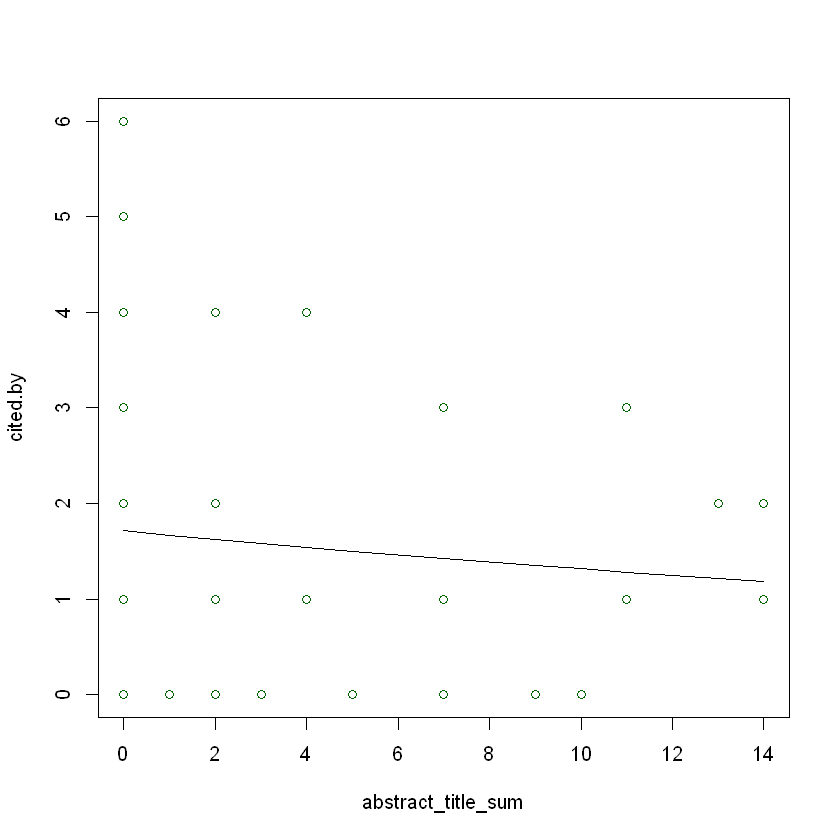

In [36]:
uni_pois_reg<- glm(cited.by ~ abstract_title_sum , data=data ,family=poisson(link=log))
summary(uni_pois_reg)



coeff=coef(uni_pois_reg)
xvalues = sort(data$abstract_title_sum)
log.means=coeff[1]+coeff[2]*xvalues
mean.values=exp(log.means)

plot(cited.by ~ abstract_title_sum , data=data,col ="darkgreen")
lines(xvalues,mean.values)
# abline(uni_pois_reg)


# Poisson Regression

In [37]:
#par(cex.lab=25)
pois_reg <- glm(cited.by ~ . , data=data ,family=poisson(link=log))

summary(pois_reg)
#pois_reg$linear.predictors
#exp(pois_reg$linear.predictors)

#str(pois_reg)
round(pois_reg$coefficients,2)
round(exp(pois_reg$coefficients),2)


Call:
glm(formula = cited.by ~ ., family = poisson(link = log), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6139  -0.9957  -0.3095   0.5106   1.9009  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.0714125  0.9344730  -1.147 0.251571    
abstract_title_sum -0.0317148  0.0296024  -1.071 0.284009    
no_authors          0.1746337  0.1108138   1.576 0.115044    
article_age         0.8926827  0.2702051   3.304 0.000954 ***
title_length       -0.0681042  0.0384555  -1.771 0.076563 .  
page.count          0.1098794  0.0631197   1.741 0.081717 .  
no_references      -0.0004971  0.0066598  -0.075 0.940500    
abstract_length    -0.0028536  0.0033357  -0.855 0.392296    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 67.146  on 40  degrees of freedom
Residual deviance: 38.757  on 33  degrees of freedom
AIC:

(Intercept) abstract_title_sum         no_authors        article_age 
             -1.07              -0.03               0.17               0.89 
      title_length         page.count      no_references    abstract_length 
             -0.07               0.11               0.00               0.00

(Intercept) abstract_title_sum         no_authors        article_age 
              0.34               0.97               1.19               2.44 
      title_length         page.count      no_references    abstract_length 
              0.93               1.12               1.00               1.00

In [38]:
save.image()